<HTML>


# Analisis de Anomalias (outlayers) en mesas de sufragio  como sustento de inpugnacion de votos  por Fuerza Popular

Hector Jakson-
Data Scientist 08/06/2020

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Analisis Exploratorio y Data wrangling](#section11)
    * [1.2. Seleccion de caracteristicas](#section12)

* [2. Visualizacion](#section2)
    * [2.1. Histogramas/ distribucion](#section21)
    * [2.2. Dispersion](#section22)
    * [2.3. Outlayers boxplot ](#section23)
    * [2.4. isolation forest](#section24)
    * [2.5. Observacion de anomalias](#section25)
    * [2.6. Z-score](#section26)
    * [2.7. Conclusiones](#section27)

## 1. Introducción

<font color="#004D7F"> </font>

Las ultimas elecciones presidenciales 2021 disputadas entre el partido __fuerza popular__ y 
__peru libre__ ha  traido consigo una serie de cuestionamientos y margenes ajustados en cuanto a los votos que definiieron al nuevo presidente del Peru ,es asi que el partido Peru Libre ha conseguido una diferencia no muy marcada en proporcion a su adversario, al cual le lleva ventaja de +40K votos a favor.


es asi que el partido fuerza popular ha planteado un recurso de inpugnacion(anulacion) de votos en mesas de sufragio en contra de Peru LIbre sustentando indicios de fraude.
entre  los sustentos la cual analizaremos, plantean que

* existen mesas de sufragio en las cuales no registran votos a favor, en algunos casos 0 votos y en otras que existen pocos votos a favor de Fuerza Popular 
*  aseguran que en primera vuelta los partidos con los cuales tiene alianzas si registraban votos a favor y en segunda vuelta por defecto deberian tener  la misma proporcion de votos que sus aliados pero no obtuvieron votos o votos en menos proporcion.
* sostienen que es imposible que existan mesas de sufragio donde hay una gran mayoria que voto a favor de Peru Libre.

















### Metodologia

* Metodo basado en el analisis de la distribucion de los votos validos de Peru Libre y de Fuerza popular y en la observacion    del desvío que mide el impacto de los outliers en la varianza de
  los datos.   
* analisis de la dispersion y normalidad de datos
* Isolation forest as sklearn
* z- score as scipy
* se agrupa las mesas de votacion por departamento como muestra "n" con votos validos a favor de Peru Libre y Fuerza popular
* el total de las mesas instaladas en el peru se consideran como el universo "N"
* Dataset :se toma la data de votos por cada MESA de votacion de la pagina oficial de la ONPE con actas procesadas al 99,616% hasta la fecha 11 de junio

*  “Un outlier es una observación que se desvía
   tanto de otras observaciones que despierta la sospecha de haber sido generado por
   un mecanismo diferente” [Hawkings, 1980].
* Barnet y Lewis definen a los outliers como “una observación (o subconjunto de
  observaciones) que parecen ser inconsistentes respecto del resto de ese conjunto
  de datos” [Barnet y otros, 1994].

### supuestos

* Los valorea atipicos (outlayers)  en el univero muestran que hubo manipulacion en las mesas de sufragio a favor de PERU LIBRE



## 1.1 Análisis exploratorio

dataset csv con el total del universo de las mesas de sufragio obtenidas de la pagina oficial de la ONPE actualizado al 11-06-2021



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
import time


In [2]:
data=pd.read_csv("C:/Users/firebaseapk/Documents/data/Resultados.csv", sep=";" , index_col=False)
data.head()



UBIGEO DEPARTAMENTO    PROVINCIA     DISTRITO TIPO_ELECCION  \
0   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS  PRESIDENCIAL   
1   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS  PRESIDENCIAL   
2   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS  PRESIDENCIAL   
3   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS  PRESIDENCIAL   
4   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS  PRESIDENCIAL   

   MESA_DE_VOTACION DESCRIP_ESTADO_ACTA  TIPO_OBSERVACION  N_CVAS  \
0                13       CONTABILIZADA               NaN   220.0   
1                26       CONTABILIZADA               NaN   144.0   
2                30       CONTABILIZADA               NaN   129.0   
3                36       CONTABILIZADA               NaN   202.0   
4                40       CONTABILIZADA               NaN   228.0   

   N_ELEC_HABIL  VOTOS_P1  VOTOS_P2  VOTOS_VB  VOTOS_VN  VOTOS_VI  
0           300     115.0      87.0       NaN      18.0       NaN  
1           300      71.0      58.0       NaN      15.0       NaN  
2           300      71.0      50.0       NaN       8.0       NaN  
3           252      66.0     105.0       5.0      26.0       NaN  
4           300     125.0      87.0       NaN      16.0       NaN

In [3]:
data.rename(columns={'VOTOS_P1':'PERU_LIBRE',
                   'VOTOS_P2':'FUERZA_POPULAR',
                   'N_CVAS':'Votos_habiles',
                   'N_ELEC_HABIL':'Total_electores_habiles',
                   'VOTOS_VB':'Votos_blancos',
                   'VOTOS_VN':'Votos_nulos',
                   'VOTOS_VI':'Votos_viciasdos'},inplace=True)

In [4]:
dataframe=data.iloc[:, [1,5,6,8,9,10,11,12,13]]
dataframe.sample(19)

DEPARTAMENTO  MESA_DE_VOTACION DESCRIP_ESTADO_ACTA  Votos_habiles  \
44097     AREQUIPA              8513       CONTABILIZADA          188.0   
2217   LA LIBERTAD             26600       CONTABILIZADA          245.0   
17739        CUSCO             15887       CONTABILIZADA          234.0   
64599         PUNO             70283       CONTABILIZADA          211.0   
62578         LIMA             42069       CONTABILIZADA          276.0   
2853          LIMA             38637       CONTABILIZADA          247.0   
84952         LIMA             52856       CONTABILIZADA          238.0   
30931         LIMA             53854       CONTABILIZADA          271.0   
13681         LIMA             37340       CONTABILIZADA          256.0   
64142     MOQUEGUA             63961       CONTABILIZADA          175.0   
17611        CUSCO             14086       CONTABILIZADA          242.0   
35995         LIMA             47239       CONTABILIZADA          248.0   
23780  LA LIBERTAD             25943       CONTABILIZADA          202.0   
18234        JUNIN             22511       CONTABILIZADA          204.0   
54235      AMERICA             80105       CONTABILIZADA          116.0   
46899         LIMA             50442       CONTABILIZADA          237.0   
25479         LIMA             53303       CONTABILIZADA          220.0   
44496       CALLAO             76482       CONTABILIZADA          239.0   
2820          LIMA             36531       CONTABILIZADA          166.0   

       Total_electores_habiles  PERU_LIBRE  FUERZA_POPULAR  Votos_blancos  \
44097                      273       142.0            42.0            NaN   
2217                       300        65.0           162.0            NaN   
17739                      282       186.0            39.0            1.0   
64599                      253       187.0            20.0            1.0   
62578                      300        44.0           219.0            NaN   
2853                       300        88.0           138.0            4.0   
84952                      300        75.0           136.0            0.0   
30931                      300        99.0           159.0            1.0   
13681                      300        79.0           162.0            1.0   
64142                      300       113.0            56.0            NaN   
17611                      300       202.0            30.0            1.0   
35995                      300        57.0           173.0            2.0   
23780                      300        58.0           134.0            1.0   
18234                      300       135.0            61.0            NaN   
54235                      299        37.0            71.0            3.0   
46899                      300        80.0           140.0            3.0   
25479                      300        99.0           101.0            2.0   
44496                      300        86.0           142.0            1.0   
2820                       300        76.0            84.0            1.0   

       Votos_nulos  
44097          4.0  
2217          18.0  
17739          8.0  
64599          3.0  
62578         13.0  
2853          17.0  
84952         27.0  
30931         12.0  
13681         14.0  
64142          6.0  
17611          9.0  
35995         16.0  
23780          9.0  
18234          8.0  
54235          5.0  
46899         14.0  
25479         18.0  
44496         10.0  
2820           5.0

In [5]:
dataframe.describe()

MESA_DE_VOTACION  Votos_habiles  Total_electores_habiles    PERU_LIBRE  \
count      86488.000000   86482.000000             86488.000000  86237.000000   
mean       72590.246924     218.043269               292.386851    102.461472   
std       161782.724177      42.927405                26.482466     46.828410   
min            1.000000       0.000000                 3.000000      1.000000   
25%        21622.750000     204.000000               300.000000     70.000000   
50%        43244.500000     230.000000               300.000000     96.000000   
75%        64866.250000     246.000000               300.000000    128.000000   
max       903108.000000     300.000000               306.000000    269.000000   

       FUERZA_POPULAR  Votos_blancos   Votos_nulos  
count    86184.000000   58596.000000  85868.000000  
mean       102.011162       2.073145     12.899334  
std         50.854092       1.595285     13.571629  
min          1.000000       0.000000      0.000000  
25%         61.000000       1.000000      8.000000  
50%        108.000000       2.000000     11.000000  
75%        143.000000       3.000000     15.000000  
max        271.000000      67.000000    300.000000

* total de mesas procesadas 82730
* PERU_LIBRE 
   - tiene un promedio de votos por mesa de 105
   - la mesa con un maximo de votos obtenido a favor es de 296
 
* FUERZA_POPULAR 
  - promedio de votos a favor por mesa 103 votos validos a favor
  - la mesa con un maximi de votos obtenidos es de 271


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86488 entries, 0 to 86487
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DEPARTAMENTO             86488 non-null  object 
 1   MESA_DE_VOTACION         86488 non-null  int64  
 2   DESCRIP_ESTADO_ACTA      86488 non-null  object 
 3   Votos_habiles            86482 non-null  float64
 4   Total_electores_habiles  86488 non-null  int64  
 5   PERU_LIBRE               86237 non-null  float64
 6   FUERZA_POPULAR           86184 non-null  float64
 7   Votos_blancos            58596 non-null  float64
 8   Votos_nulos              85868 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 5.9+ MB


In [9]:
dataframe.isnull().sum()

DEPARTAMENTO                   0
MESA_DE_VOTACION               0
DESCRIP_ESTADO_ACTA            0
Votos_habiles                  6
Total_electores_habiles        0
PERU_LIBRE                   251
FUERZA_POPULAR               304
Votos_blancos              27892
Votos_nulos                  620
dtype: int64

In [10]:
dataframe=dataframe.fillna(0)


In [13]:
dataframe.isnull().sum()

DEPARTAMENTO               0
MESA_DE_VOTACION           0
DESCRIP_ESTADO_ACTA        0
Votos_habiles              0
Total_electores_habiles    0
PERU_LIBRE                 0
FUERZA_POPULAR             0
Votos_blancos              0
Votos_nulos                0
dtype: int64

In [11]:
data=dataframe[['Votos_habiles','PERU_LIBRE','FUERZA_POPULAR','Votos_blancos','Votos_nulos']].astype(int) 
data.head()

Votos_habiles  PERU_LIBRE  FUERZA_POPULAR  Votos_blancos  Votos_nulos
0            220         115              87              0           18
1            144          71              58              0           15
2            129          71              50              0            8
3            202          66             105              5           26
4            228         125              87              0           16

In [12]:
data.loc[:,'DEPARTAMENTO']=(dataframe['DEPARTAMENTO'])
data.loc[:,'MESA_DE_VOTACION']=(dataframe['MESA_DE_VOTACION'])
data.loc[:,'DESCRIP_ESTADO_ACTA']=(dataframe['DESCRIP_ESTADO_ACTA'])
data.loc[:,'Total_electores_habiles']=(dataframe['Total_electores_habiles'])

data.head()

Votos_habiles  PERU_LIBRE  FUERZA_POPULAR  Votos_blancos  Votos_nulos  \
0            220         115              87              0           18   
1            144          71              58              0           15   
2            129          71              50              0            8   
3            202          66             105              5           26   
4            228         125              87              0           16   

  DEPARTAMENTO  MESA_DE_VOTACION DESCRIP_ESTADO_ACTA  Total_electores_habiles  
0     AMAZONAS                13       CONTABILIZADA                      300  
1     AMAZONAS                26       CONTABILIZADA                      300  
2     AMAZONAS                30       CONTABILIZADA                      300  
3     AMAZONAS                36       CONTABILIZADA                      252  
4     AMAZONAS                40       CONTABILIZADA                      300

In [13]:
data.describe()

Votos_habiles    PERU_LIBRE  FUERZA_POPULAR  Votos_blancos  \
count   86488.000000  86488.000000    86488.000000   86488.000000   
mean      218.028143    102.164115      101.652599       1.404565   
std        42.964315     47.084131       51.122380       1.631953   
min         0.000000      0.000000        0.000000       0.000000   
25%       204.000000     70.000000       60.000000       0.000000   
50%       230.000000     96.000000      108.000000       1.000000   
75%       246.000000    128.000000      142.000000       2.000000   
max       300.000000    269.000000      271.000000      67.000000   

        Votos_nulos  MESA_DE_VOTACION  Total_electores_habiles  
count  86488.000000      86488.000000             86488.000000  
mean      12.806863      72590.246924               292.386851  
std       13.566613     161782.724177                26.482466  
min        0.000000          1.000000                 3.000000  
25%        8.000000      21622.750000               300.000000  
50%       11.000000      43244.500000               300.000000  
75%       15.000000      64866.250000               300.000000  
max      300.000000     903108.000000               306.000000

In [14]:
peru_libre=data['PERU_LIBRE'].values.sum()
Fuerza_popular=data['FUERZA_POPULAR'].values.sum()
votos_diferencia=peru_libre-Fuerza_popular
stages = ["Votos_emitidos", "DIFERENCIA"]
df_mtl = pd.DataFrame(dict(number=[peru_libre, votos_diferencia], stage=stages))
df_mtl['votos'] = 'Peru_libre'
df_mt2 = pd.DataFrame(dict(number=[Fuerza_popular, 0], stage=stages))
df_mt2['votos'] = 'Fuerza_popular'
df = pd.concat([df_mtl, df_mt2], axis=0)
fig = px.funnel(df, x='number', y='stage', color='votos', title="Conteo de votos,  actas procesadas al 100%  06/06/2021 23:30:00 a 10/06/2021 15:51:00")
fig.show()

In [15]:
data.groupby("DEPARTAMENTO").size()


DEPARTAMENTO
AFRICA               5
AMAZONAS          1105
AMERICA           2253
ANCASH            3102
APURIMAC          1125
AREQUIPA          3950
ASIA               146
AYACUCHO          1704
CAJAMARCA         3828
CALLAO            2754
CUSCO             3526
EUROPA            1012
HUANCAVELICA      1094
HUANUCO           2051
ICA               2223
JUNIN             3425
LA LIBERTAD       4852
LAMBAYEQUE        3333
LIMA             27942
LORETO            2392
MADRE DE DIOS      396
MOQUEGUA           524
OCEANIA             24
PASCO              695
PIURA             4811
PUNO              3163
SAN MARTIN        2188
TACNA              974
TUMBES             574
UCAYALI           1317
dtype: int64

 * filtramos AFRICA ,AMERICA,ASIA,EUROPA,OCEANIA

In [16]:
indexNames_af=data[data['DEPARTAMENTO'] == 'AFRICA' ].index
indexNames_am=data[data['DEPARTAMENTO'] == 'AMERICA' ].index
indexNames_as=data[data['DEPARTAMENTO'] == 'ASIA' ].index
indexNames_eu=data[data['DEPARTAMENTO'] == 'EUROPA' ].index
indexNames_oc=data[data['DEPARTAMENTO'] == 'OCEANIA' ].index

In [17]:
data.drop(indexNames_af , inplace=True)
data.drop(indexNames_am , inplace=True)
data.drop(indexNames_as , inplace=True)
data.drop(indexNames_eu , inplace=True)
data.drop(indexNames_oc , inplace=True)


In [18]:
data.groupby("DEPARTAMENTO").size()


DEPARTAMENTO
AMAZONAS          1105
ANCASH            3102
APURIMAC          1125
AREQUIPA          3950
AYACUCHO          1704
CAJAMARCA         3828
CALLAO            2754
CUSCO             3526
HUANCAVELICA      1094
HUANUCO           2051
ICA               2223
JUNIN             3425
LA LIBERTAD       4852
LAMBAYEQUE        3333
LIMA             27942
LORETO            2392
MADRE DE DIOS      396
MOQUEGUA           524
PASCO              695
PIURA             4811
PUNO              3163
SAN MARTIN        2188
TACNA              974
TUMBES             574
UCAYALI           1317
dtype: int64

In [19]:
dataframe=data
dataframe.head(5)

Votos_habiles  PERU_LIBRE  FUERZA_POPULAR  Votos_blancos  Votos_nulos  \
0            220         115              87              0           18   
1            144          71              58              0           15   
2            129          71              50              0            8   
3            202          66             105              5           26   
4            228         125              87              0           16   

  DEPARTAMENTO  MESA_DE_VOTACION DESCRIP_ESTADO_ACTA  Total_electores_habiles  
0     AMAZONAS                13       CONTABILIZADA                      300  
1     AMAZONAS                26       CONTABILIZADA                      300  
2     AMAZONAS                30       CONTABILIZADA                      300  
3     AMAZONAS                36       CONTABILIZADA                      252  
4     AMAZONAS                40       CONTABILIZADA                      300

agrupamos las mesas de votacion por departamento

In [20]:
mesas_departamento=pd.DataFrame(dataframe.groupby("DEPARTAMENTO").size(),
                                columns=['mesas_votacion'])
mesas_departamento.reset_index(inplace=True)
mesas_departamento.sample(5)

DEPARTAMENTO  mesas_votacion
20           PUNO            3163
24        UCAYALI            1317
18          PASCO             695
16  MADRE DE DIOS             396
2        APURIMAC            1125

In [21]:
import plotly.express as px

fig=px.line(mesas_departamento, x="DEPARTAMENTO",
            y="mesas_votacion")
fig.show()

## 1.2. Seleccion de caracteristicas

---
<a id="section12"></a>
<font color="#004D7F"></font>

In [35]:
dataframe.columns

Index(['Votos_habiles', 'PERU_LIBRE', 'FUERZA_POPULAR', 'Votos_blancos',
       'Votos_nulos', 'DEPARTAMENTO', 'MESA_DE_VOTACION',
       'DESCRIP_ESTADO_ACTA', 'Total_electores_habiles'],
      dtype='object')

In [25]:
values_3=dataframe.iloc[:, [5,1,2]]  # seleccion  columnas a analizar
values_3

DEPARTAMENTO  PERU_LIBRE  FUERZA_POPULAR
0         AMAZONAS         115              87
1         AMAZONAS          71              58
2         AMAZONAS          71              50
3         AMAZONAS          66             105
4         AMAZONAS         125              87
...            ...         ...             ...
86483      UCAYALI         101              35
86484      UCAYALI          92             114
86485      UCAYALI          98             112
86486      UCAYALI          76             132
86487      UCAYALI         105             116

[83048 rows x 3 columns]

In [26]:
values_3.describe()

PERU_LIBRE  FUERZA_POPULAR
count  83048.000000    83048.000000
mean     105.039242      103.207085
std       45.645884       51.424228
min        0.000000        0.000000
25%       73.000000       61.000000
50%       98.000000      111.000000
75%      130.000000      144.000000
max      269.000000      271.000000

##  2. Visualización 
<a id="section2"></a>
 <font color="#004D7F"></font>

Se procede a la visualizacion de los datos para analizar el comportamiento y distribución, 
para ello, tenemos  librerías fundamentales para poder
trabajarlo: __MatPlotlib__ ,__Plotly__ y __Seaborn__. Veamos algunas conclusiones sobre la distribución de nuestros datos.

<a id="section31"></a> 


<Figure size 432x288 with 0 Axes>

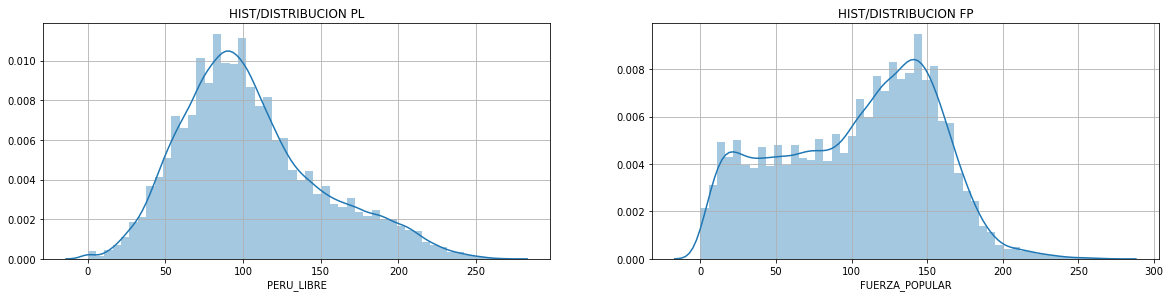

In [27]:

plt.figure(1)
plt.subplots(figsize=(20,20))
plt.subplot(421)

sns.distplot(values_3['PERU_LIBRE'])
plt.title('HIST/DISTRIBUCION PL')
plt.grid(True)

plt.subplot(422)
sns.distplot(values_3['FUERZA_POPULAR'])
plt.title('HIST/DISTRIBUCION FP')
plt.grid(True)

plt.show()


<a id="section21"></a> 


C:\Users\firebaseapk\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



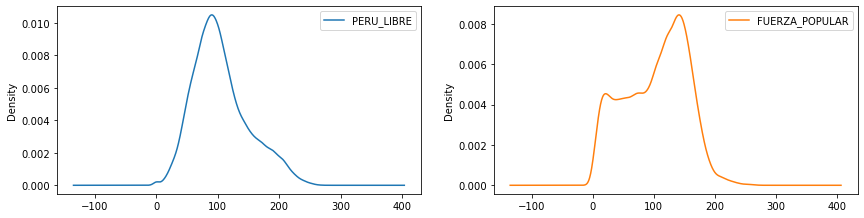

In [28]:
fig = plt.figure(figsize = (30,20))
ax = fig.gca()
values_3.plot( ax=ax , kind= 'density', subplots= True, layout = (5,4), sharex= False)
plt.show()

In [63]:
values_3.skew()

PERU_LIBRE        0.655817
FUERZA_POPULAR   -0.199712
dtype: float64

In [64]:
values_3.kurtosis()  


PERU_LIBRE        0.094076
FUERZA_POPULAR   -0.845417
dtype: float64

In [73]:
values_3.var()

PERU_LIBRE        2083.546728
FUERZA_POPULAR    2644.451269
dtype: float64

<a id="section22"></a> 


### 2.2 Visualizacion de dispersion x mesas de sufragio

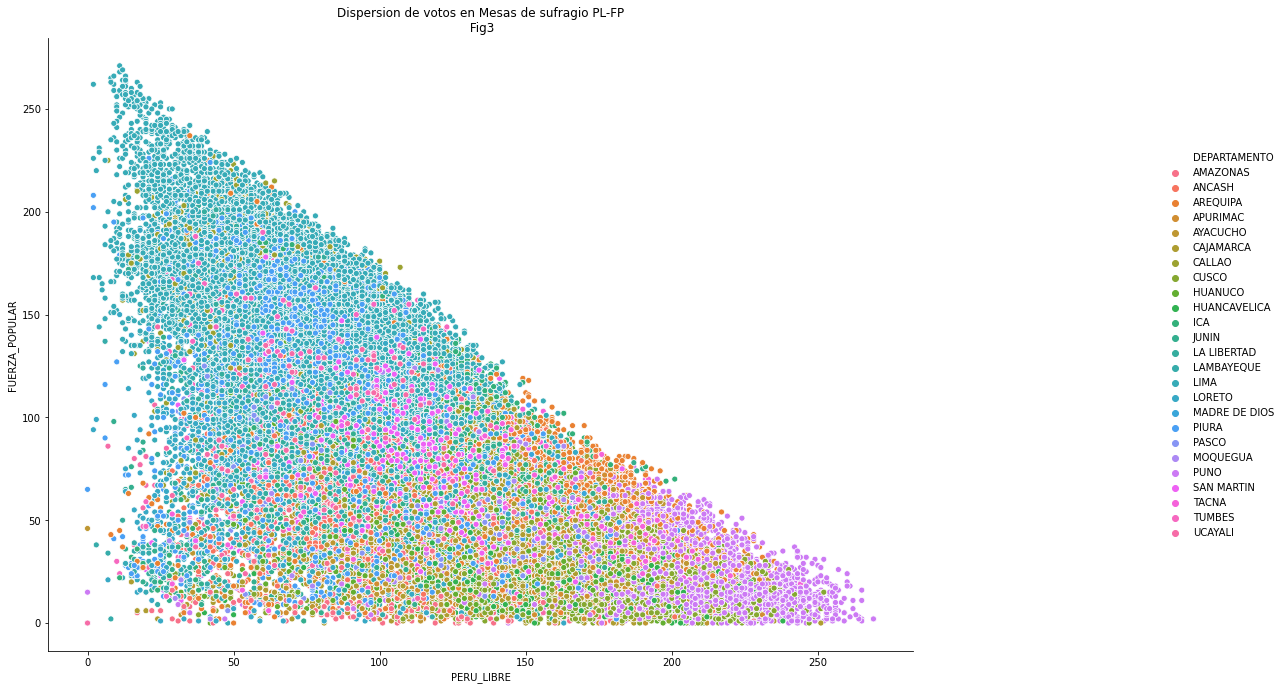

In [29]:
sns.relplot(x="PERU_LIBRE", y="FUERZA_POPULAR", 
            hue="DEPARTAMENTO", 
            sizes=(15, 200), 
            data=values_3).set(title='Dispersion de votos en Mesas de sufragio PL-FP\n Fig3');
plt.gcf().set_size_inches(20, 10)

<a id="section32"></a>


* Scatterplot de las mesas de sufragio , muestran valores de votos en mesas de votacion muy dispersos en algunos departamentos

<a id="section23"></a> 


### 2.3 Box plot con Outlayers

se observa en el boxplot

* la mediana se sitúa en el centro de la caja entonces existiria una distribución es simétrica y tanto la media, mediana y moda coinciden.



* pero existen datos dispersos superiores a la media, estos datos inicializan a partir de 200 , muy alejados y aglomerados entre ese rango , esto es una prueba clara de que existen outlayers en los datos y a su vez se encuentran valores muy dispersos que nose ajustarian a una distribucion normal ,estos valores atípicos  están mas allá del límite superior.

* los outlayers visualizados son sustento base para inferir que hubo manipulacion para generar esos valores anomaloes


In [32]:
import plotly.graph_objects as go
y0 = values_3['PERU_LIBRE']
y1 = values_3['FUERZA_POPULAR']
fig = go.Figure()
fig.add_trace(go.Box(y=y0, name="Peru Libre"))
fig.update_layout(title="boxplot/observation outlayers ", xaxis_title="Partidos",yaxis_title="Numero de Votos", legend_title="Partidos", width=600,
height=800)
fig.add_trace(go.Box(y=y1, name="Fuerza Popular"))
fig.show()

<a id="section24"></a> 

### 2.4 Isolation Forest

isolation Forest es una método no supervisado para identificar anomalías (outliers) cuando los datos no están etiquetados, es decir, no se conoce la clasificación real (anomalía - no anomalía) de las observaciones.

Su funcionamiento está inspirado en el algoritmo de clasificación y regresión Random Forest. Al igual que en Random Forest, un modelo Isolation Forest está formado por la combinación de múltiples árboles llamados isolation trees. Estos árboles se crea de forma similar a los de clasificación-regresión: las observaciones de entrenamiento se van separando de forma recursiva creando las ramas del árbol hasta que cada observación queda aislada en un nodo terminal. Sin embargo, en los isolation tree, la selección de los puntos de división se hace de forma aleatoria. Aquellas observaciones con características distintas al resto, quedarán aisladas a las pocas divisiones, por lo que el número de nodos necesarios para llegar a estas observación desde el inicio del árbol (profundidad) es menor que para el resto.


Las anomalías son patrones de datos que tienen características de datos diferentes a las de las instancias normales. La detección de anomalías tiene una relevancia significativa y, a menudo, proporciona información procesable crítica en varios dominios de aplicaciones



In [33]:
from sklearn.ensemble import IsolationForest


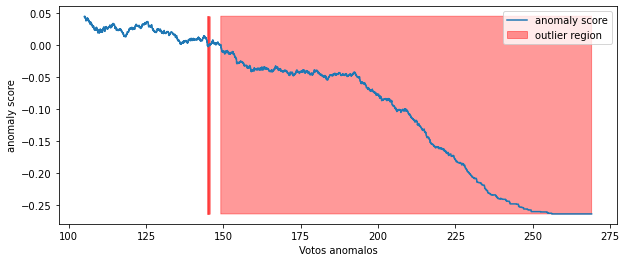

In [34]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(values_3['PERU_LIBRE'].values.reshape(-1, 1))


xx = np.linspace(values_3['PERU_LIBRE'].mean(), 
                 values_3['PERU_LIBRE'].max(), len(values_3)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)


plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Votos anomalos')
plt.show();

* puntuaciones menores a 0 valores atipicos
*  se observa la existencia de datos con anomalias con puntuaciones negativas muy marcadas en el outlier region
* 150 es el valor donde empieza a notarse anomalias

In [36]:
peru_libre=pd.DataFrame(values_3['PERU_LIBRE'].values>150 ,
                        columns=['MAYOR_150'])
peru_libre.sample(100)

MAYOR_150
50730      False
61650      False
63694       True
44507      False
36907      False
...          ...
6947       False
73230       True
25640       True
74619      False
24488      False

[100 rows x 1 columns]

<AxesSubplot:xlabel='MAYOR_150', ylabel='count'>

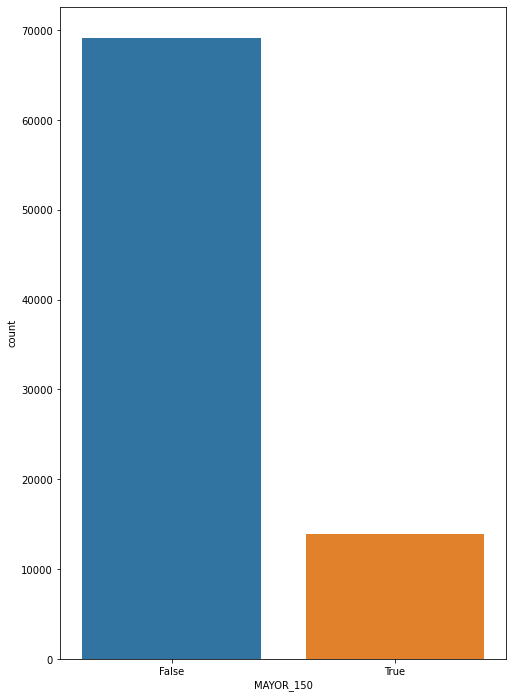

In [37]:
fig =plt.figure(figsize=(8,12))
sns.countplot(peru_libre["MAYOR_150"])

In [38]:
peru_libre.groupby("MAYOR_150").size()

MAYOR_150
False    69175
True     13873
dtype: int64

valores observados 13873 , valores mayores a 150 con anomalias.

### seleccion de muestra con anomalia

In [44]:
values_4=dataframe.iloc[:, [5,6,1,2]]  
values_4

DEPARTAMENTO  MESA_DE_VOTACION  PERU_LIBRE  FUERZA_POPULAR
0         AMAZONAS                13         115              87
1         AMAZONAS                26          71              58
2         AMAZONAS                30          71              50
3         AMAZONAS                36          66             105
4         AMAZONAS                40         125              87
...            ...               ...         ...             ...
86483      UCAYALI             79430         101              35
86484      UCAYALI             79064          92             114
86485      UCAYALI             79270          98             112
86486      UCAYALI             78884          76             132
86487      UCAYALI             79080         105             116

[83048 rows x 4 columns]

In [53]:
peru_libre_outlayers=pd.DataFrame(values_4['PERU_LIBRE'].values>150 ,
                                  columns=['MAYOR_150'])
peru_libre_outlayers.sample(100)

MAYOR_150
22214      False
6428       False
67603      False
47372      False
46304      False
...          ...
67871      False
20544       True
36736      False
77869      False
17255      False

[100 rows x 1 columns]

* para evaluar tomanos valores mayores a 150 de un ejemplo de 100 datos aleatorios
* el indice 20544 retorna un valor true ( verdadero ) a 150,  el valor de esta mesa se procede a analizar

In [55]:
mesa_70069=pd.DataFrame(dataframe.iloc[20544])
mesa_70069



21367
Votos_habiles                      230
PERU_LIBRE                         203
FUERZA_POPULAR                      15
Votos_blancos                        1
Votos_nulos                         11
DEPARTAMENTO                      PUNO
MESA_DE_VOTACION                 70448
DESCRIP_ESTADO_ACTA      CONTABILIZADA
Total_electores_habiles            300

Url ONPE Acta __MESA_DE_VOTACION__
 #n 0-70448 


https://www.resultadossep.eleccionesgenerales2021.pe/SEP2021/Actas/Numero/070448

<a id="section25"></a>


### Analisis de anomalia detectada

Tomanos una  muestra donde se encuentran la mesa  observada con anomalias y los agrupamos  segun el departamento donde pertenece
* mesa con outlayer pertenece al departamento de PUNO
* entre el rango de puntuacion de 0 a -0.5 tomanos votos de mayor a > 150 

In [57]:
values_5=dataframe[['DEPARTAMENTO','PERU_LIBRE']]

In [58]:
values_5.shape

(83048, 2)

In [59]:
outlayers_puno=values_5[(values_5.DEPARTAMENTO=='PUNO')&
                        (values_5.PERU_LIBRE>150)]
outlayers_puno.describe()



PERU_LIBRE
count  3069.000000
mean    206.845226
std      21.864325
min     151.000000
25%     192.000000
50%     206.000000
75%     222.000000
max     269.000000

<Figure size 432x288 with 0 Axes>

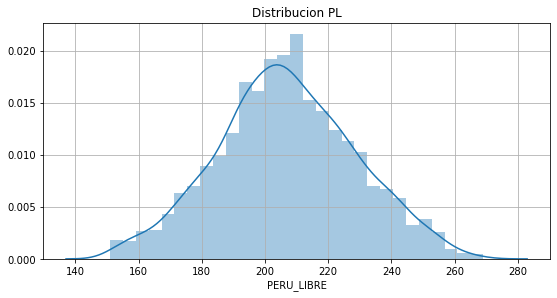

In [60]:
plt.figure(1)
plt.subplots(figsize=(20,20))

plt.subplot(421)
sns.distplot(outlayers_puno['PERU_LIBRE'])
plt.title('Distribucion PL')
plt.grid(True)

In [74]:
outlayers_puno.kurt()

PERU_LIBRE   -0.265251
dtype: float64

In [77]:
outlayers_puno['PERU_LIBRE']

4810     223
4813     222
4814     218
4817     206
4822     188
        ... 
86224    224
86225    222
86226    211
86227    202
86228    226
Name: PERU_LIBRE, Length: 3069, dtype: int32

In [78]:
import scipy.stats as sp  
sp.kurtosis(outlayers_puno['PERU_LIBRE'])

-0.2667732061524868

se observa que el histograma y la distribucion presenta una distribucion  normal 

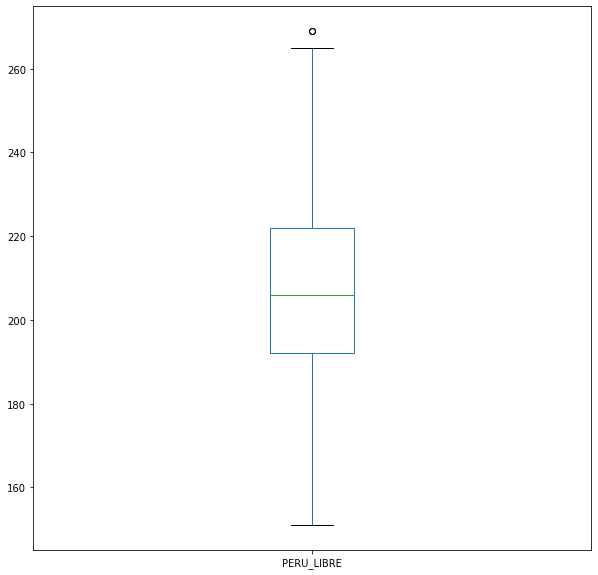

In [62]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
outlayers_puno.plot(ax=ax,kind='box',subplots=True,layout=(6,5),sharex=False)
plt.show()

* se observa que las mesas de sufragio de la muestra no presentan outlayers en mayores proporciones con respecto al universo, esto indica que  las mesas de sufragio con similitud(departamento) tendrian un tedencia a superar la media del universo esto las generaria anomalas para el universo pero no para la muestra debido a que existe una tendecia de tener votos en mayor proporcion 

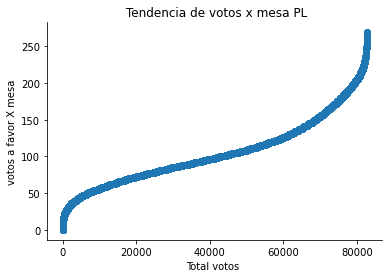

In [234]:

plt.scatter(range(values_3.shape[0]),
            np.sort(values_3['PERU_LIBRE'].values))
plt.xlabel('Total votos ')
plt.ylabel('votos a favor X mesa')
plt.title(" Tendencia de votos x mesa PL")
sns.despine()

existe una clara tendencia creciente de votos a favor de PL , en el grafico se muestra que no existe un intervalo que haga un corte a la tendencia


---
<a id="section26"></a>
## Z-score

indica el número de estándar las desviaciones de una observación o dato está por encima o por debajo de la media
* z is the "z-score" (Standard Score)
* x is the value to be standardized
* μ ('mu") is the mean
* σ ("sigma") is the standard deviation

z score mide la desviacion de una observacion con respecto al universo

* How to Detect and Handle Outliers( Boris lglewicz and David C. Hoaglin ) , si el valor absoluto de la puntuacion es mayor 3.5  la observacion es atipica

In [66]:
dataframe_z=dataframe.iloc[:, [5,1]]
values_z=pd.DataFrame(dataframe_z.groupby("DEPARTAMENTO").sum())# sumatoria de votos en mesa por departamento

values_z.reset_index()


DEPARTAMENTO  PERU_LIBRE
0        AMAZONAS      121162
1          ANCASH      347457
2        APURIMAC      174344
3        AREQUIPA      558085
4        AYACUCHO      266824
5       CAJAMARCA      509790
6          CALLAO      198503
7           CUSCO      610521
8    HUANCAVELICA      166279
9         HUANUCO      255556
10            ICA      233316
11          JUNIN      396598
12    LA LIBERTAD      392224
13     LAMBAYEQUE      289784
14           LIMA     2195630
15         LORETO      193765
16  MADRE DE DIOS       57387
17       MOQUEGUA       80520
18          PASCO       82851
19          PIURA      388805
20           PUNO      645813
21     SAN MARTIN      241317
22          TACNA      154223
23         TUMBES       41464
24        UCAYALI      121081

In [67]:
values_z.describe()

PERU_LIBRE
count  2.500000e+01
mean   3.489320e+05
std    4.213451e+05
min    4.146400e+04
25%    1.542230e+05
50%    2.413170e+05
75%    3.922240e+05
max    2.195630e+06

In [68]:
values_z['zScore'] = (values_z["PERU_LIBRE"] - values_z["PERU_LIBRE"].mean() ) / values_z["PERU_LIBRE"].std()
values_z

PERU_LIBRE    zScore
DEPARTAMENTO                       
AMAZONAS           121162 -0.540578
ANCASH             347457 -0.003501
APURIMAC           174344 -0.414359
AREQUIPA           558085  0.496394
AYACUCHO           266824 -0.194871
CAJAMARCA          509790  0.381773
CALLAO             198503 -0.357021
CUSCO              610521  0.620843
HUANCAVELICA       166279 -0.433500
HUANUCO            255556 -0.221614
ICA                233316 -0.274397
JUNIN              396598  0.113128
LA LIBERTAD        392224  0.102747
LAMBAYEQUE         289784 -0.140379
LIMA              2195630  4.382863
LORETO             193765 -0.368266
MADRE DE DIOS       57387 -0.691939
MOQUEGUA            80520 -0.637036
PASCO               82851 -0.631504
PIURA              388805  0.094633
PUNO               645813  0.704603
SAN MARTIN         241317 -0.255408
TACNA              154223 -0.462113
TUMBES              41464 -0.729729
UCAYALI            121081 -0.540770

### Valores con z-score positivos

In [69]:
values_pos=values_z[(values_z.zScore>0)]
values_pos=values_pos['zScore']
values_pos

DEPARTAMENTO
AREQUIPA       0.496394
CAJAMARCA      0.381773
CUSCO          0.620843
JUNIN          0.113128
LA LIBERTAD    0.102747
LIMA           4.382863
PIURA          0.094633
PUNO           0.704603
Name: zScore, dtype: float64

In [70]:

values_pos[(values_pos>=3.5)] # dato atipico

DEPARTAMENTO
LIMA    4.382863
Name: zScore, dtype: float64

### valores con z-score negativos

In [71]:
values_neg=values_z[(values_z.zScore<0)]
values_neg=values_neg['zScore']
values_neg

DEPARTAMENTO
AMAZONAS        -0.540578
ANCASH          -0.003501
APURIMAC        -0.414359
AYACUCHO        -0.194871
CALLAO          -0.357021
HUANCAVELICA    -0.433500
HUANUCO         -0.221614
ICA             -0.274397
LAMBAYEQUE      -0.140379
LORETO          -0.368266
MADRE DE DIOS   -0.691939
MOQUEGUA        -0.637036
PASCO           -0.631504
SAN MARTIN      -0.255408
TACNA           -0.462113
TUMBES          -0.729729
UCAYALI         -0.540770
Name: zScore, dtype: float64

### Visualizacion de valores del Zscore por deparamtento

In [72]:
import plotly.graph_objects as go

deps = values_z.index.tolist()
data=values_z['zScore']
fig = go.Figure()
fig.add_trace(go.Bar(x=deps, y=data,
                base=[-0.7],
                marker_color='crimson',
                name='expenses'))

fig.show()

<a id="section27"></a>

## Conclusiones

En el analisis del universo(Total de mesas de sufragio a nivel nacional)  los outlayers  con votos mayores a 200 a favor de PL son muy marcadas y tambien se observan valores dispersos (fig3) , esto  podria ser prueba de que  existio una manipulacion externa para la generacion de esos valores y favorecer a PL.

Pero analizando las muestras(total de mesas por departamento) que generaron esos outlayers se observa que una de las muestras tomadas aleatoriamente siguen una tendencia creciente superior a la media del universo con una distribucion normal y poca dispersion que favorecieron a PL en cuanto a votos, estos valores altos en cuanto a votos observados son valores legítimos pero sorprendente inesperados puesto que pertenecen a esa muestra. y si procediera a eliminar el conjunto de mesas con outlayers,estas no tendrian impacto significativo en la varianza.

De lo contratio si estas mesas que generaron outlayers no tendrian una tendecia en cuanto votos mayores a la media y estarian muy dispersas  seria indicio a discutir de que si existio manipulacion  a favor de PL.

Las puntuaciones  del z-score no mostraron valores suficientemente altos para concluir  a excepsion de Lima.

Dada estas particularidadees se debera hacer mas pruebas con un analisis mas profundo y con rigor para llegar a un conclusion definitiva para este caso

</HTML>


<div style="text-align: right"> <font size=10>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

In [83]:
print("Peru," ,"fecha-hora", time.strftime('%Y-%m-%d %H:%M:%S', time.localtime()))

Peru, fecha-hora 2021-06-21 00:47:48
